<a href="https://colab.research.google.com/github/veronicaruiz404/SimMat/blob/main/Examen1_RuizVeronica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su **capacidad de interpretar los resultados**. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (3.4 puntos)

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

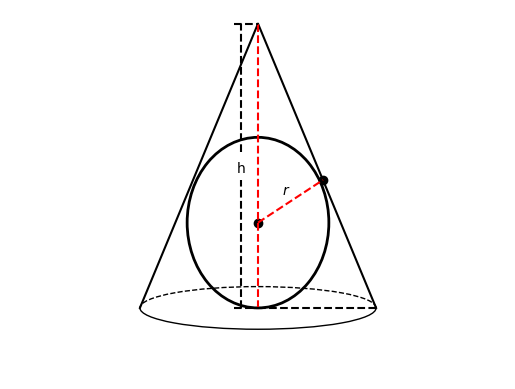

In [ ]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (1.4 puntos)

In [ ]:
import sympy as sp

h, H, R = sp.symbols('h H R', positive=True)

r = (R/H) * h

V = (sp.pi * r**2 * h) / 3

V_simplificada = sp.simplify(V)

V_simplificada


pi*R**2*h**3/(3*H**2)

2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$. (1 punto)

In [ ]:
import sympy as sp

h, r = sp.symbols('h r', positive=True)

V = (sp.pi/3) * (2*r*h - h**2) * h

V_r2 = V.subs(r, 2)

dV_dh = sp.diff(V_r2, h)
h_min = sp.solve(sp.Eq(dV_dh, 0), h)

V_r2_simplificada = sp.simplify(V_r2)
h_min


[8/3]

3. ¿Cuál es el área mínima del cono? (1 punto)

In [ ]:
import sympy as sp

h, R = sp.symbols('h R', positive=True)

a = sp.sqrt(2*R*h - h**2)
l = sp.sqrt(2*R*h)

S = sp.pi * a**2 + sp.pi * a * l
S_simpl = sp.simplify(S)

S_R2 = S_simpl.subs(R, 2)

dS_dh = sp.diff(S_R2, h)

h_min = sp.nsolve(dS_dh, h, 2)

S_min = S_R2.subs(h, h_min)

h_min, sp.N(h_min), sp.simplify(S_min), sp.N(S_min)

(2.35961179679779, 2.35961179679779, 9.91494959082815*pi, 31.1487327952588)

---
# Segundo punto. Programación lineal (3.4 puntos)
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(2.2 puntos)}
\end{equation}

In [ ]:
import pulp

modelo = pulp.LpProblem("Mezcla_Golosinas", pulp.LpMaximize)

marcas = ['M1', 'M2', 'M3']
productos = ['P1', 'P2', 'P3']
x = pulp.LpVariable.dicts("x", (marcas, productos), lowBound=0)

precio = {'P1': 4, 'P2': 3, 'P3': 2}
costo = {'M1': 3, 'M2': 2, 'M3': 1}
disp = {'M1': 2000, 'M2': 4000, 'M3': 1000}

modelo += pulp.lpSum((precio[j] - costo[i]) * x[i][j] for i in marcas for j in productos), "Beneficio_Total"

for i in marcas:
    modelo += pulp.lpSum(x[i][j] for j in productos) <= disp[i], f"Disponibilidad_{i}"

modelo += x['M1']['P1'] >= 0.8 * (x['M1']['P1'] + x['M2']['P1'] + x['M3']['P1'])
modelo += x['M3']['P1'] <= 0.2 * (x['M1']['P1'] + x['M2']['P1'] + x['M3']['P1'])

modelo += x['M1']['P2'] >= 0.2 * (x['M1']['P2'] + x['M2']['P2'] + x['M3']['P2'])
modelo += x['M3']['P2'] <= 0.8 * (x['M1']['P2'] + x['M2']['P2'] + x['M3']['P2'])

modelo += x['M3']['P3'] <= 0.7 * (x['M1']['P3'] + x['M2']['P3'] + x['M3']['P3'])

modelo.solve(pulp.PULP_CBC_CMD(msg=False))

print("Estado de la solución:", pulp.LpStatus[modelo.status])
print("\nDistribución óptima (x_ij):")
for i in marcas:
    for j in productos:
        print(f"{i} en {j}: {x[i][j].varValue:.2f}")

print("\nBeneficio máximo total = {:.2f} u.m.".format(pulp.value(modelo.objective)))


Estado de la solución: Optimal

Distribución óptima (x_ij):
M1 en P1: 800.00
M1 en P2: 1200.00
M1 en P3: 0.00
M2 en P1: 200.00
M2 en P2: 3800.00
M2 en P3: 0.00
M3 en P1: 0.00
M3 en P2: 1000.00
M3 en P3: 0.00

Beneficio máximo total = 7000.00 u.m.


2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera? (1.2 puntos)

In [ ]:
import numpy as np
from scipy.optimize import linprog

r = np.array([1, 0, -1, 2, 1, 0, 3, 2, 1], dtype=float)

c = -r

A_ub = []
b_ub = []

A_ub.append([1,1,1, 0,0,0, 0,0,0]); b_ub.append(2000)
A_ub.append([0,0,0, 1,1,1, 0,0,0]); b_ub.append(4000)
A_ub.append([0,0,0, 0,0,0, 1,1,1]); b_ub.append(1000)

A_ub.append([-1,0,0, 4,0,0, 4,0,0]); b_ub.append(0)
A_ub.append([-1,0,0, -1,0,0, 4,0,0]); b_ub.append(0)

A_ub.append([0,-4,0, 0,1,0, 0,1,0]); b_ub.append(0)
A_ub.append([0,-4,0, 0,-4,0, 0,1,0]); b_ub.append(0)

A_ub.append([0,0,-7, 0,0,-7, 0,0,3]); b_ub.append(0)

A_ub = np.array(A_ub, dtype=float)
b_ub = np.array(b_ub, dtype=float)

bounds = [(0, None)] * 9

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

print("Estado:", res.message)
print("Éxito:", res.success)
print("\nValores óptimos (x11,x12,x13,x21,x22,x23,x31,x32,x33):")
print(res.x)
print("\nBeneficio máximo:", -res.fun)

Estado: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Éxito: True

Valores óptimos (x11,x12,x13,x21,x22,x23,x31,x32,x33):
[ 800. 1200.    0.  200. 3800.    0.    0. 1000.    0.]

Beneficio máximo: 7000.0


---
# Tercer punto. Ajuste de curvas (3.4 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [ ]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
ban

/tmp/ipython-input-1613858795.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')


,values
date,
1988-12-31,594.6
1989-12-31,643.0
1990-12-31,725.5
1991-12-31,880.4
1992-12-31,972.5
1993-12-31,918.7
1994-12-31,845.3
1995-12-31,858.1
1996-12-31,1042.1


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores cuadráticos de forma gráfica, ¿Qué polinómio se ajusta mejor? (2 puntos)

Grado 1: Error cuadrático medio = 11119.63
Grado 2: Error cuadrático medio = 11119.62
Grado 3: Error cuadrático medio = 10857.96
Grado 4: Error cuadrático medio = 7598.78
Grado 5: Error cuadrático medio = 7598.15


/tmp/ipython-input-3442119560.py:20: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, g)


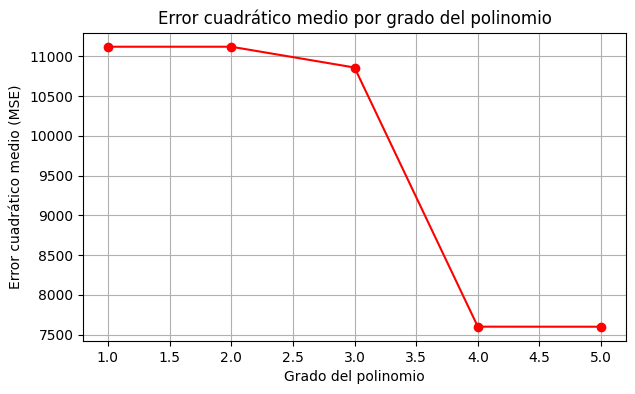


➡️ El polinomio que mejor se ajusta es de grado 5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

date_rng = pd.date_range(start='1/1/1988', end='31/12/2001', freq='YE')
ban = pd.DataFrame(date_rng, columns=['date'])
ban['values'] = np.array([594.6, 643.0, 725.5, 880.4, 972.5, 918.7, 845.3,
                          858.1, 1042.1, 1317.0, 1429.5, 1392.0, 1277.0, 1386.6])
ban['year'] = ban['date'].dt.year

x = ban['year'].values
y = ban['values'].values

errores = []
grados = range(1, 6)

for g in grados:
    p = np.polyfit(x, y, g)
    y_pred = np.polyval(p, x)
    error = np.mean((y - y_pred)**2)
    errores.append(error)
    print(f"Grado {g}: Error cuadrático medio = {error:.2f}")
c
plt.figure(figsize=(7,4))
plt.plot(grados, errores, marker='o', color='red')
plt.title("Error cuadrático medio por grado del polinomio")
plt.xlabel("Grado del polinomio")
plt.ylabel("Error cuadrático medio (MSE)")
plt.grid(True)
plt.show()

mejor_grado = grados[np.argmin(errores)]
print(f"\n➡️ El polinomio que mejor se ajusta es de grado {mejor_grado}")


2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.7 puntos)

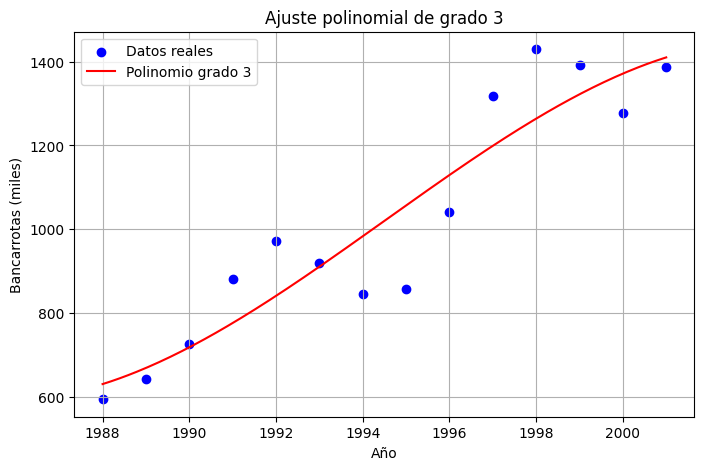

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

date_rng = pd.date_range(start='1/1/1988', end='31/12/2001', freq='YE')
ban = pd.DataFrame(date_rng, columns=['date'])
ban['values'] = np.array([594.6, 643.0, 725.5, 880.4, 972.5, 918.7, 845.3,
                          858.1, 1042.1, 1317.0, 1429.5, 1392.0, 1277.0, 1386.6])
ban['year'] = ban['date'].dt.year

x = ban['year'].values
y = ban['values'].values

mejor_grado = 3
p = np.polyfit(x, y, mejor_grado)

x_cont = np.linspace(x.min(), x.max(), 200)
y_fit = np.polyval(p, x_cont)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_cont, y_fit, color='red', label=f'Polinomio grado {mejor_grado}')
plt.title(f"Ajuste polinomial de grado {mejor_grado}")
plt.xlabel("Año")
plt.ylabel("Bancarrotas (miles)")
plt.legend()
plt.grid(True)
plt.show()

3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.7 puntos)

In [ ]:
import numpy as np
import pandas as pd

date_rng = pd.date_range(start='1/1/1988', end='31/12/2001', freq='YE')
ban = pd.DataFrame(date_rng, columns=['date'])
ban['values'] = np.array([594.6, 643.0, 725.5, 880.4, 972.5, 918.7, 845.3,
                          858.1, 1042.1, 1317.0, 1429.5, 1392.0, 1277.0, 1386.6])
ban['year'] = ban['date'].dt.year

x = ban['year'].values
y = ban['values'].values

p = np.polyfit(x, y, 3)

y_1995 = np.polyval(p, 1995.5)
y_2020 = np.polyval(p, 2020)

print(f"Predicción para mediados de 1995: {y_1995:.2f} miles de bancarrotas")
print(f"Predicción para el año 2020: {y_2020:.2f} miles de bancarrotas")

print("""
Diferencias:
- La predicción de 1995.5 es una **interpolación**, está dentro del rango 1988–2001 → más confiable.
- La predicción para 2020 es una **extrapolación**, fuera del rango → menos precisa o irrealista.
""")


Predicción para mediados de 1995: 1093.34 miles de bancarrotas
Predicción para el año 2020: -2461.95 miles de bancarrotas

Diferencias:
- La predicción de 1995.5 es una **interpolación**, está dentro del rango 1988–2001 → más confiable.
- La predicción para 2020 es una **extrapolación**, fuera del rango → menos precisa o irrealista.

